# Assignment - Final Project
## Week# 10
## Date - Aug-10-2021
## Author - Ganesh Kale

#### _**Project Overview**_

**Introduction** - From the beginning, since first news paper printed, every news that makes into page has had a specific section allotted to it. The newspaper style, news sections, format etc.. have been changed over the time but not the categorization of the news and it still carried over even in to the digital version of newspaper. News articles are not limited to few topics, it covers a wide range of interest from politcs to sports to moveis and so on.
**For long time, this process of categorization news was done manually by people and used to allot news to respective section(category).**
With digitalization of news paper, the news gets updated every moment and allocating to them to appropriate category can be cumbersome task. 

**How to Solve this problem** - To avoid manual news categorization, with help of latest technology, Natural Language Processing and machine leanring, this problem will tackled to classify and predict which category a piece of news will fall into based on the news headline and short description.

**What model will be built for and How it would help** - In order to solve the manual news categorization problem, A machine learning model will be built using supervised machine learning techniques, that would learn from existing news headlines and short description and predict the news category appropriately.
With the help of this model the news categorization can be automated and it would save manual work and help users to read the news of their interest in right section.

#### _Data Description:_

Context -  This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost. The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.

Each news headline has a corresponding category. Categories and corresponding article have different counts. These categories are predefined the time of collecting the data and assigned them accordingly.

#### _import required packages_

In [56]:
import numpy as np
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import re
import sys
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### _load the data set_

In [57]:
news = pd.read_json("data/News_Category_Dataset_v2.json", lines=True)

#### _display dimension and top 5 records from the data set_

In [58]:
news.shape
news.head()

(200853, 6)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


#### _display data set variable data types and Non-null count_

In [59]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


#### _display descriptive stat summary of categorical variables_

In [61]:
news.describe(include='object')

,category,headline,authors,link,short_description
count,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://highline....,
freq,32739,90,36620,2,19712


## Exploratory Data Analysis - Data Visualization

#### _display number of news per category_

In [62]:
news.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

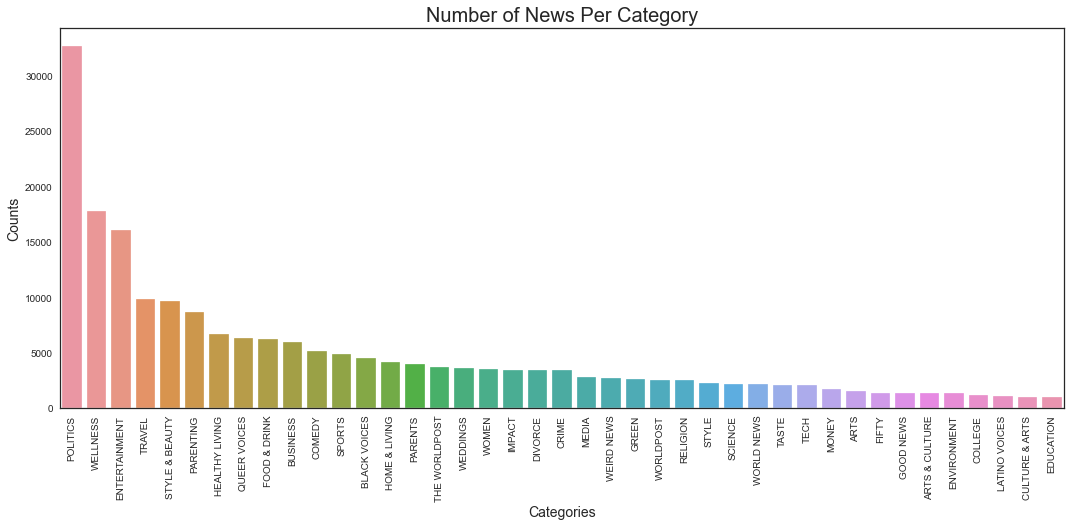

In [63]:
# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot bar chart for categories and news count
sns.barplot(data=news, x=news.category.value_counts().index,y=news.category.value_counts())
plt.xlabel('Categories',fontdict = {"fontsize":14})
plt.ylabel('Counts',fontdict = {"fontsize":14})
plt.title('Number of News Per Category',fontdict = {"fontsize":20})
plt.xticks(rotation=90);

#### _display how many news each year_

In [64]:
# create new column year by extracting year from date column

news['year'] = news['date'].apply(lambda x : x.year)

In [65]:
# display the new column details

news.year.describe()

count    200853.000000
mean       2014.611930
std           1.801049
min        2012.000000
25%        2013.000000
50%        2015.000000
75%        2016.000000
max        2018.000000
Name: year, dtype: float64

In [66]:
# counts of news each year

news.year.value_counts()

2013    34583
2014    32339
2016    32098
2015    32006
2012    31355
2017    29889
2018     8583
Name: year, dtype: int64

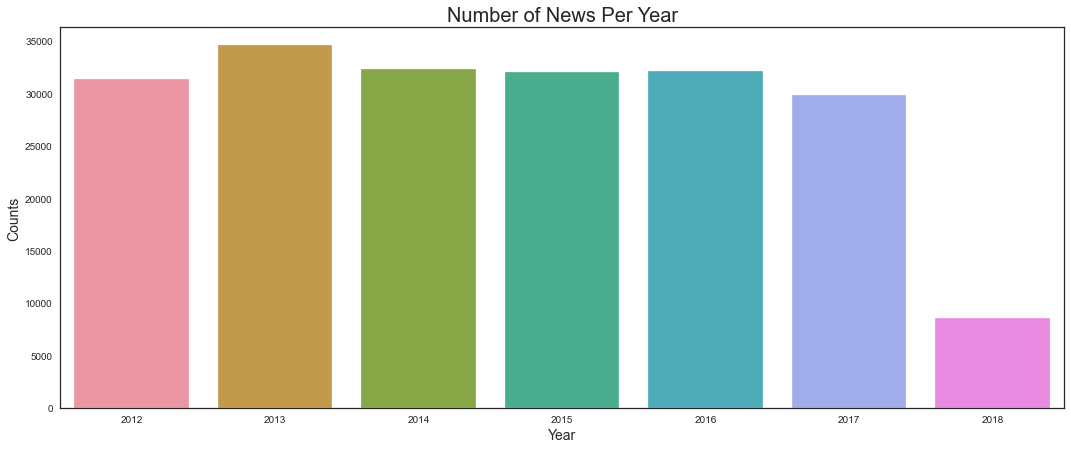

In [67]:
# bar plot to show counts of news each year

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot bar chart for categories and news count
sns.barplot(data=news, x=news.year.value_counts().index,y=news.year.value_counts())
plt.xlabel('Year',fontdict = {"fontsize":14})
plt.ylabel('Counts',fontdict = {"fontsize":14})
plt.title('Number of News Per Year',fontdict = {"fontsize":20});

#### _display distribution of words in headline and short new summary_

In [68]:
# create new column for number of words in headline and short description

news['num_words_head'] = news.headline.apply(lambda x : len(x.split()))
news['num_words_summary'] = news.short_description.apply(lambda x : len(x.split()))

In [69]:
# display the summary of new columns

news[['num_words_head','num_words_summary']].describe()

,num_words_head,num_words_summary
count,200853.000000,200853.000000
mean,9.538563,19.728289
std,3.089320,14.409189
min,0.000000,0.000000
25%,7.000000,10.000000
50%,10.000000,19.000000
75%,12.000000,24.000000
max,44.000000,243.000000


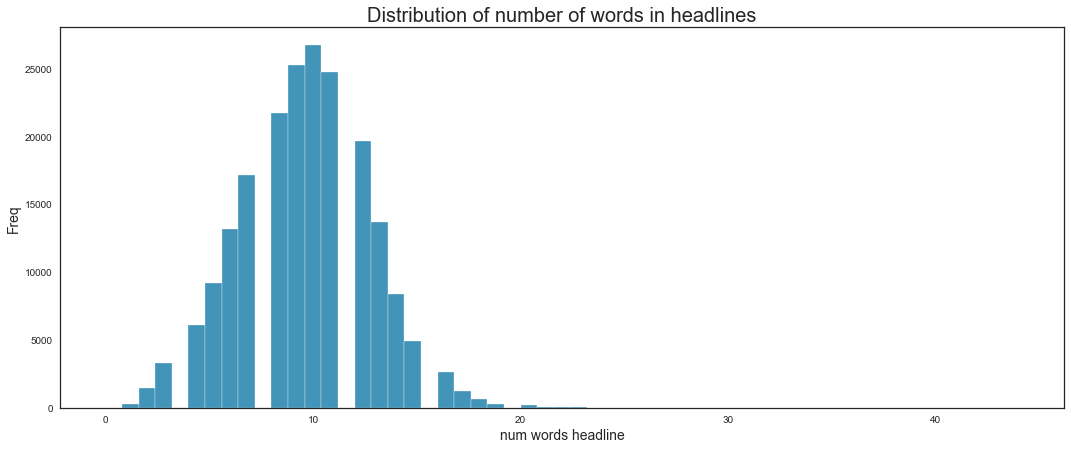

In [70]:
# Distribution of number of words in headline

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot histogram chart for number of words in headlines
sns.histplot(data=news, x='num_words_head', binwidth=0.8, bins=40,)
plt.xlabel('num words headline',fontdict = {"fontsize":14})
plt.ylabel('Freq',fontdict = {"fontsize":14})
plt.title('Distribution of number of words in headlines',fontdict = {"fontsize":20});

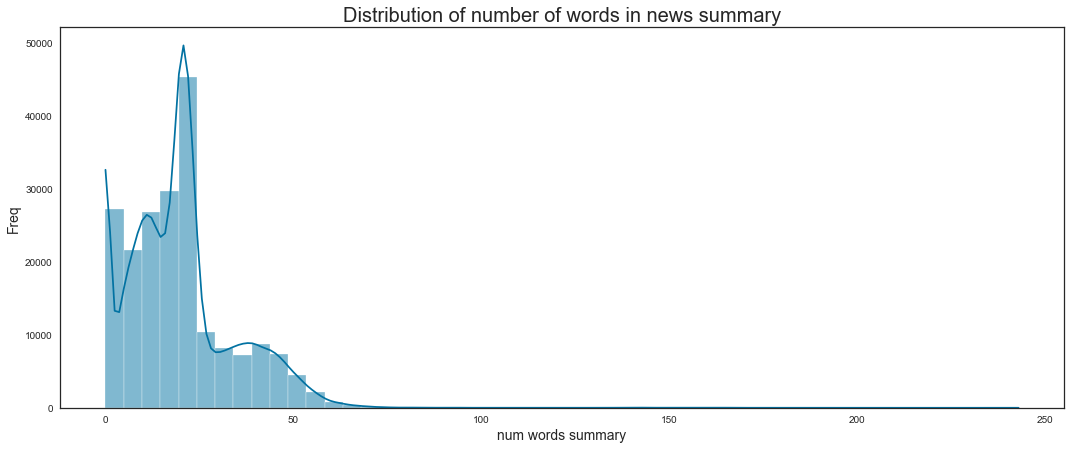

In [71]:
# Distribution of number of words in short description

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot histogram chart for number of words in headlines
sns.histplot(data=news, x='num_words_summary', bins=50, kde=True,)
plt.xlabel('num words summary',fontdict = {"fontsize":14})
plt.ylabel('Freq',fontdict = {"fontsize":14})
plt.title('Distribution of number of words in news summary',fontdict = {"fontsize":20});

## Insights Gained from Graphical Analysis

1. Bar Chart - Number of news per category:
This bar chart shows that the number of news in each category is not same across categories so our class in imbalance and we should use proper techniques to balance the classes/categories.
There are more Politics news than rest of the categories.

2. Bar Chart - Number of news per year:
Based on bar chart we can see that the number of news are same each year except 2018. In 2018 we have jusk around 8.5K news. This helps to understand we may skip this year and drop news in next step.

3. Histogram - Distribution of number of words in headline - 
This distribution shows that it has some outliers with word count more than 20,once that headlines are removed then distribution will be normal distribution.

4. Histogram - Distribution of number of words in short description - 
Based on this hostogram we can see that the distribution is skewed and outliers exist. We need to remove the outliers with word count more than 50.

### _Drop Features that are not required_

The main goal of this project is to predict the appropriate category from news headline and news short description, so these are the two columns we need to train model. Hence we are going to drop rest unwanted features from the data set.

The below list of features will be dropped from the data set -

1. authors - This feature tells who wrote the news but it would help use determine the news category, we we are going to drop this feature.

2. link - this feature shows source of the news and it does not required for news categorization. So it will be dropped.

3. date - this feature explains what date the news was published and this either would not help to solve the problem, hence it will be removed from the data set.

4. year - This feature was created from date, to see the distribution of news and headlines and this will be removed as well.

5. num_words_head and num_words_summary - These features were created to see the words distribution in headlines and summary respectively and will be used to remove outliers from the dataset. Once outliers are removed based on these feature numbers, it will be dropped from data set.

In [73]:
# drop the features - 

drop_features = ['authors','link','date','year']

news_df = news.drop(drop_features,axis=1)

In [74]:
# display head of new dataframe

news_df.shape
news_df.head()

(200853, 5)

,category,headline,short_description,num_words_head,num_words_summary
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,14,13
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,14,6
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,10,15
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,11,14
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",13,13


#### _Remove Outliers from the dataset_

1. Headlines with word count more than 21 words - Based on the histograms plotted above, we can see in the headline column, we have very few headlines with words more than 21, so we are going to remove those headlines.

2. News Short Descriptionwith word count more than 60 words - The histogram above shows the news short description with word count more than 60 words are very few and because of this, we are going to keep news short description with word count less than 61 words.

In [75]:
# remove headlines with more that 21 word count and short description with more than 60 words.

news_df = news_df.loc[(news_df.loc[:,'num_words_head']<=21) & (news_df.loc[:,'num_words_summary']<=60)]

In [76]:
# display shape and top records

news_df.shape
news_df.head()

(199470, 5)

,category,headline,short_description,num_words_head,num_words_summary
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,14,13
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,14,6
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,10,15
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,11,14
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",13,13


#### _Display distribution of word counts in headlines and short description_

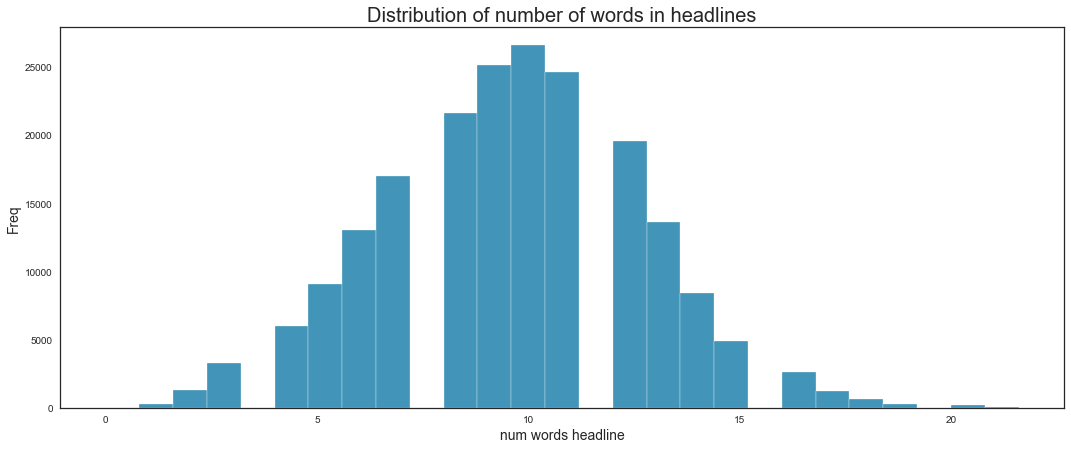

In [77]:
# Distribution of number of words in headline after removing outliers

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot histogram chart for number of words in headlines
sns.histplot(data=news_df, x='num_words_head', binwidth=0.8, bins=40)
plt.xlabel('num words headline',fontdict = {"fontsize":14})
plt.ylabel('Freq',fontdict = {"fontsize":14})
plt.title('Distribution of number of words in headlines',fontdict = {"fontsize":20});

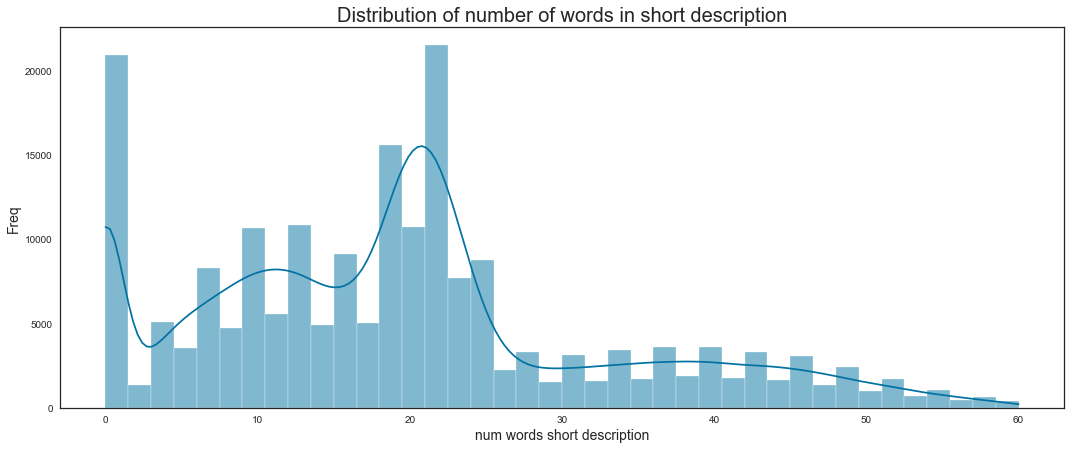

In [78]:
# Distribution of number of words in short description after removing outliers

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot histogram chart for number of words in headlines
sns.histplot(data=news_df, x='num_words_summary', bins=40, kde=True)
plt.xlabel('num words short description',fontdict = {"fontsize":14})
plt.ylabel('Freq',fontdict = {"fontsize":14})
plt.title('Distribution of number of words in short description',fontdict = {"fontsize":20});

#### _Drop num_words_summary and num_words_head columns from the data set_

In [79]:
# drop two columns

news_df = news_df.drop(['num_words_summary','num_words_head'], axis=1)

In [80]:
# display head of dataframe

news_df.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


#### _check if any features have missing info or blank/null_

In [81]:
# display the balnk strings in headline and short description column

len(news_df[news_df['headline']==""])

len(news_df[news_df['short_description']==""])

6

19692

<AxesSubplot:>

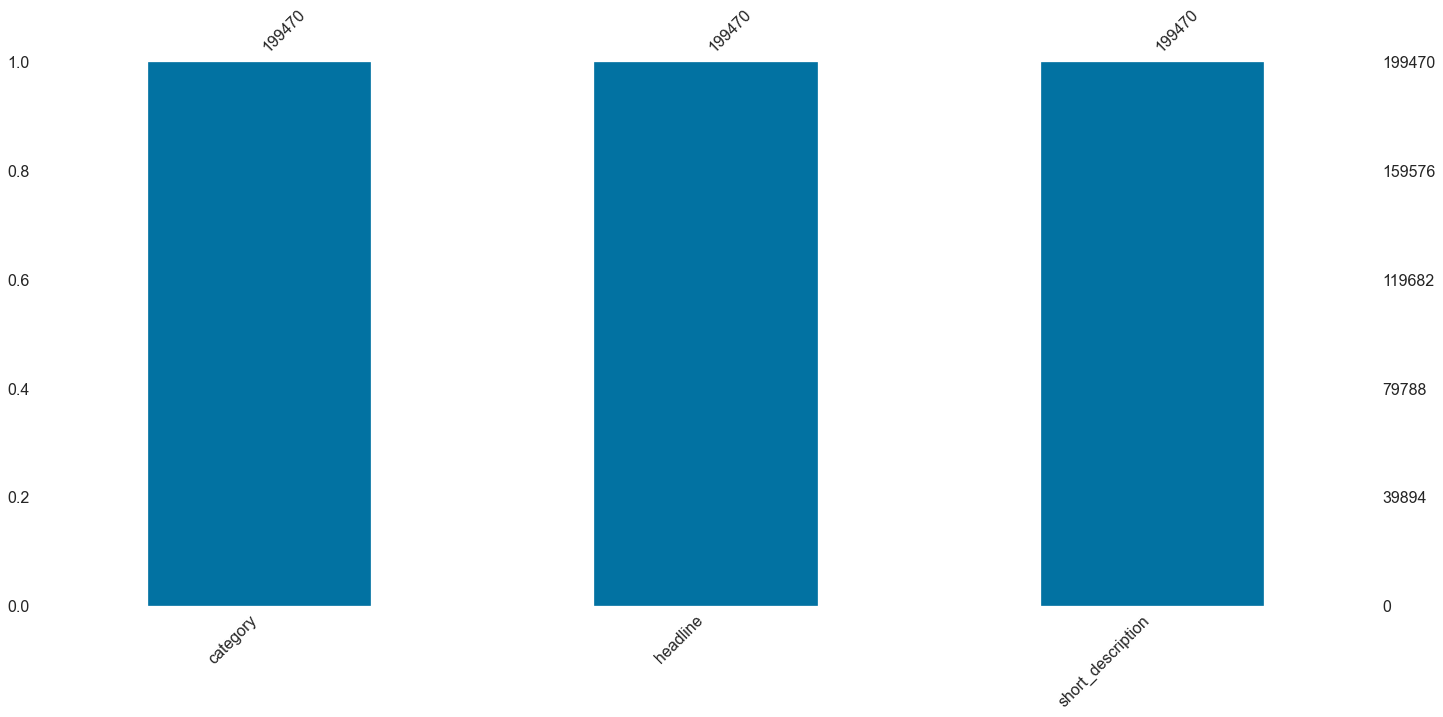

In [82]:
# display bars for each features with non-null values


msno.bar(news_df, color ='b')

Based on above bar charts, it shows that we do not have any missing values or blanks in the features.

#### _Remove duplicates from the data set_

In [83]:
# check if any headlines are duplicates

dup_headlines = news_df.duplicated('headline', keep=False)

In [84]:
# display count of duplicate headlines 

news_df[dup_headlines].shape[0]

2118

In [85]:
# check if any headlines are duplicates

dup_summary = news_df.duplicated('short_description', keep=False)

In [86]:
# display count of duplicate headlines 

news_df[dup_summary].shape[0]

23391

#### _Remove duplicate headlines from the data set_

In [87]:
# remove duplicate headlines and short description

news_df = news_df[~dup_headlines]

news_df = news_df[~dup_summary]

<ipython-input-87-ba8f806c2f23>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  news_df = news_df[~dup_summary]


#### _Create new Column by joining headline and short description columns_

In [88]:
news_df['news_text'] = news_df['headline'] + ". " + news_df['short_description']

In [89]:
# displaye shape and head of 

news_df.shape
news_df.head()

(174713, 4)

,category,headline,short_description,news_text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


#### _Modify the Categories_

In [90]:
# check count of news in each category 

news_df.category.value_counts().reset_index()

,index,category
0,POLITICS,28759
1,WELLNESS,17284
2,ENTERTAINMENT,13077
3,TRAVEL,9207
4,PARENTING,8495
5,STYLE & BEAUTY,8305
6,FOOD & DRINK,6162
7,QUEER VOICES,5289
8,HEALTHY LIVING,5042
9,BUSINESS,4990


Based on above distribution, there are imbalanced categories acrross the data set and few categories are redundant and can be clubbed into another category.
For example categories - QUEER VOICES, BLACK VOICES, LATINO VOICES clubbed into one category called 'GROUP VOICES

New feature is created from category column called merged_category and club all the relavant categories and their corresponding news and headlines.

In [91]:
# save all the categories in variable

categories = news_df.category.value_counts().index

#  created function to group categories into new column

def group_category(category_list, name):
    for cat in categories:
        if cat in category_list:
            news_df.loc[news_df['category']==cat,'merged_category']= name


In [92]:
# create new column by running above function

group_category( category_list= ['WELLNESS', 'HEALTHY LIVING','HOME & LIVING','STYLE & BEAUTY' ,'STYLE'] , name =  'LIFESTYLE')

group_category( category_list= [ 'PARENTING', 'PARENTS' ,'EDUCATION' ,'COLLEGE'] , name =  'PARENTING AND EDUCATION')

group_category( category_list= ['SPORTS','ENTERTAINMENT' , 'COMEDY','WEIRD NEWS','ARTS','MEDIA'] , name =  'SPORTS AND ENTERTAINMENT')

group_category( category_list= ['TRAVEL', 'ARTS & CULTURE','CULTURE & ARTS','FOOD & DRINK', 'TASTE'] , name =  'TRAVEL-TOURISM & ART-CULTURE')

group_category( category_list= ['QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name =  'EMPOWERED VOICES')

group_category( category_list= ['BUSINESS' ,  'MONEY'] , name =  'BUSINESS-MONEY')

group_category( category_list= ['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS'] , name =  'WORLDNEWS')

group_category( category_list= ['ENVIRONMENT' ,'GREEN'] , name =  'ENVIRONMENT')

group_category( category_list= ['TECH', 'SCIENCE'] , name =  'SCIENCE AND TECH')

group_category( category_list= ['FIFTY' , 'IMPACT' ,'GOOD NEWS'] , name =  'GENERAL')

group_category( category_list= ['WEDDINGS', 'DIVORCE',  'RELIGION','WOMEN'] , name =  'MISCELLANEOUS')

group_category( category_list= ['POLITICS'] , name =  'POLITICS') 
group_category( category_list= ['CRIME'] , name =  'CRIME')

In [93]:
# display top records after creating new feature and grouping categories

news_df.head()

,category,headline,short_description,news_text,merged_category
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,CRIME
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,SPORTS AND ENTERTAINMENT
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...,SPORTS AND ENTERTAINMENT
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,SPORTS AND ENTERTAINMENT
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,SPORTS AND ENTERTAINMENT


In [94]:
# check count of news in each category 

news_df.merged_category.value_counts().reset_index()

,index,merged_category
0,LIFESTYLE,35989
1,POLITICS,28759
2,SPORTS AND ENTERTAINMENT,26703
3,TRAVEL-TOURISM & ART-CULTURE,19532
4,PARENTING AND EDUCATION,13642
5,MISCELLANEOUS,11622
6,EMPOWERED VOICES,10318
7,WORLDNEWS,6951
8,BUSINESS-MONEY,6688
9,GENERAL,4904


After merging few categories together still we do see the classes are imbalanced. Lifestyle and wellness has more records than others.Environment category has lowest data, to have all classes same data we need to use data balancing techniques to balance classes in next few steps

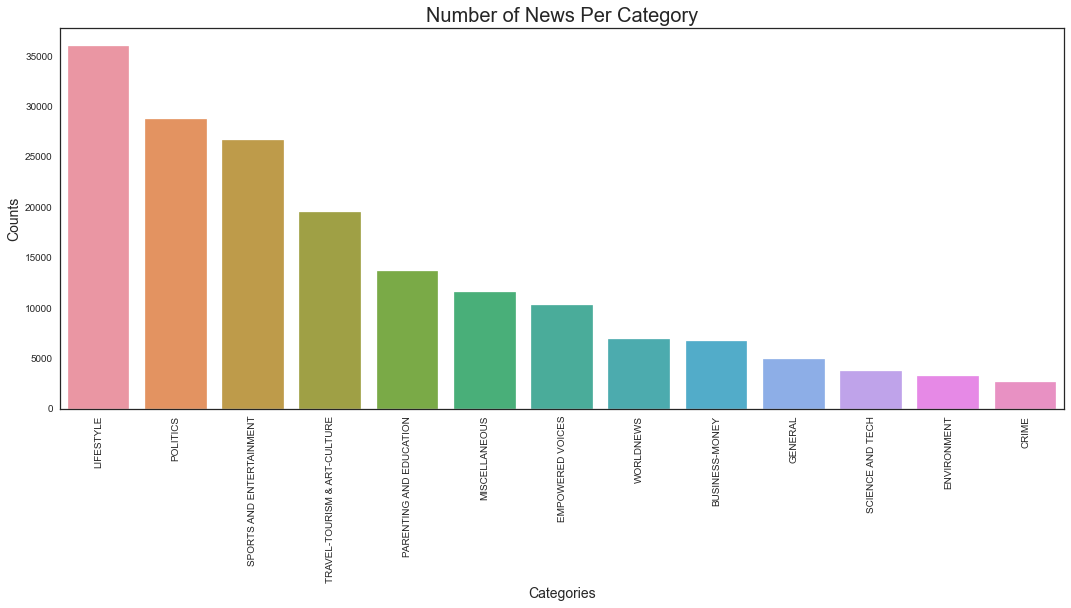

In [95]:
# Display the merged categories for news counts

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot bar chart for categories and news count
sns.barplot(data=news_df, x=news_df.merged_category.value_counts().index,y=news_df.merged_category.value_counts())
plt.xlabel('Categories',fontdict = {"fontsize":14})
plt.ylabel('Counts',fontdict = {"fontsize":14})
plt.title('Number of News Per Category',fontdict = {"fontsize":20})
plt.xticks(rotation=90);

### _Pre-Processing Texts_

In [97]:
# create function to clean text

def clean_news_text(strng):
    """function to clean text for - 
     lower case, remove urls, remove non-alpha-numeric chars.
     white space"""
    strng = strng.lower()
    strng = strng.strip()
    strng = re.sub(r'http\S+',"",strng)
    strng = re.sub(r'[^A-Za-z0-9]'," ",strng)
    return strng

In [98]:
# clean the news text

news_df['news_text'] = news_df.news_text.apply(lambda x: clean_news_text(x))

In [99]:
# display head of cleaned news text df

news_df.head()

,category,headline,short_description,news_text,merged_category
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,there were 2 mass shootings in texas last week...,CRIME
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,will smith joins diplo and nicky jam for the 2...,SPORTS AND ENTERTAINMENT
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,hugh grant marries for the first time at age 5...,SPORTS AND ENTERTAINMENT
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,jim carrey blasts castrato adam schiff and d...,SPORTS AND ENTERTAINMENT
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",julianna margulies uses donald trump poop bags...,SPORTS AND ENTERTAINMENT


In [100]:
# remove punctuations and stop words from news_text column

# dictionary of punctuations characters with keys and none as values

punctuations = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

# removing punctuations from the text column
news_df['news_text'] = news_df.news_text.apply(lambda x : x.translate(punctuations))

In [101]:
# remove stop words using nltk 

stop_words = stopwords.words('english')

# removing stop words from the text column
news_df['news_text'] = news_df['news_text'].apply(lambda x : ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

In [102]:
# stemming the texts using nltk stemmer

from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()
news_df['news_text'] = news_df['news_text'].apply(lambda x : ' '.join([porter.stem(word) for word in word_tokenize(x)]))

In [103]:
# create tfidf feature matrix

from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate tfidf

tfidf = TfidfVectorizer()

feature_matrix = tfidf.fit_transform(news_df['news_text'])

In [104]:
# import lable encoder and endocde target class

from sklearn.preprocessing import LabelEncoder

one_hot = LabelEncoder()

target_matrix = one_hot.fit_transform(news_df['merged_category'])

In [105]:
# display the encoded values mapping with classes

class_mapping = dict(zip(one_hot.classes_,one_hot.transform(one_hot.classes_)))
print(class_mapping)

{'BUSINESS-MONEY': 0, 'CRIME': 1, 'EMPOWERED VOICES': 2, 'ENVIRONMENT': 3, 'GENERAL': 4, 'LIFESTYLE': 5, 'MISCELLANEOUS': 6, 'PARENTING AND EDUCATION': 7, 'POLITICS': 8, 'SCIENCE AND TECH': 9, 'SPORTS AND ENTERTAINMENT': 10, 'TRAVEL-TOURISM & ART-CULTURE': 11, 'WORLDNEWS': 12}


### _Split the data set into train and validation_

In [106]:
# import required package

from sklearn.model_selection import train_test_split

In [107]:
#  split data sets

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target_matrix, test_size=0.3, random_state=42)

In [108]:
# display shape of train and validation data sets

f"Training dataset shape: {X_train.shape[0]}"
f"Validation dataset shape: {X_test.shape[0]}"

'Training dataset shape: 122299'

'Validation dataset shape: 52414'

### _Balance the Categories using SMOTE_

Based on above bar chart we still have imbalnce of categories, in order balance categories, we are going to use SMOTE method
Since majority class has 35898 records and minority class has 3248 records. SMOTE method will balance the classes in all categories with same as majority class.

In [109]:
# import SMOTE

from imblearn.over_sampling import SMOTE

In [110]:
# create instance of SMOTE

smote = SMOTE()

In [111]:
# using SMOTE methode balance the classes

features_smote, target_smote = smote.fit_resample(X_train,y_train)

In [112]:
# display shape of X_smote and y_smote & X, y

X_train.shape, y_train.shape
features_smote.shape, target_smote.shape

((122299, 58806), (122299,))

((328302, 58806), (328302,))

In [113]:
# display y_smote distribution and cat column(y)

from collections import Counter

f"Category Classes before balancing: {Counter(y_train)}"
f"Category Classes after balancing: {Counter(target_smote)}"

'Category Classes before balancing: Counter({5: 25254, 8: 20151, 10: 18561, 11: 13574, 7: 9535, 6: 8104, 2: 7285, 12: 4933, 0: 4780, 4: 3430, 9: 2596, 3: 2264, 1: 1832})'

'Category Classes after balancing: Counter({7: 25254, 5: 25254, 11: 25254, 8: 25254, 4: 25254, 2: 25254, 10: 25254, 6: 25254, 12: 25254, 0: 25254, 9: 25254, 1: 25254, 3: 25254})'

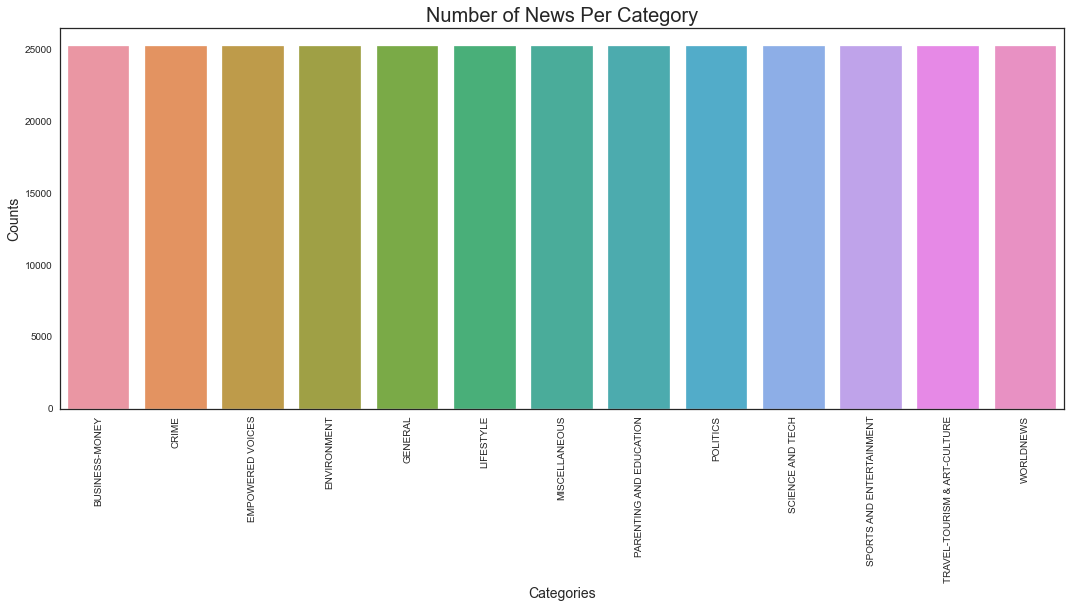

In [115]:
# Display the merged categories for news counts after balancing the classes for training dataset

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot bar chart for categories and news count
temp = pd.Series(Counter(target_smote).values(), index=class_mapping.keys())
sns.barplot(data=news_df, x=temp.index.to_numpy(),y=temp.values)
plt.xlabel('Categories',fontdict = {"fontsize":14})
plt.ylabel('Counts',fontdict = {"fontsize":14})
plt.title('Number of News Per Category',fontdict = {"fontsize":20})
plt.xticks(rotation=90);

We have balanced calsses now and each category is having 36K news samples in training data set

#### _Validation data set target class distribution_

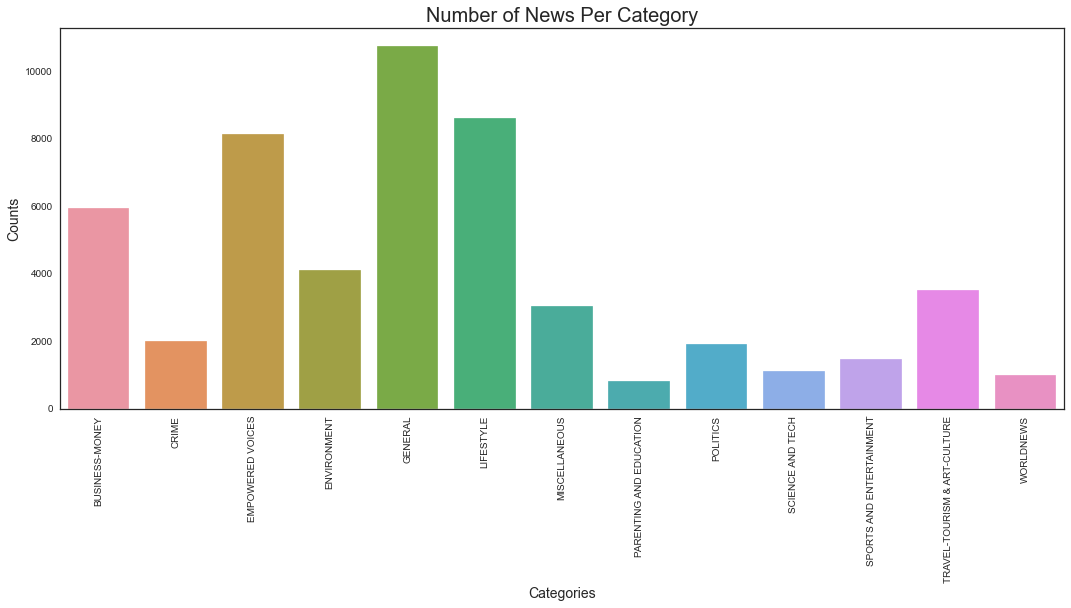

In [125]:
# Display the merged categories for news counts after balancing the classes for testing dataset

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot bar chart for categories and news count
temp = pd.Series(Counter(y_test).values(), index=class_mapping.keys())
sns.barplot(data=news_df, x=temp.index.to_numpy(),y=temp.values)
plt.xlabel('Categories',fontdict = {"fontsize":14})
plt.ylabel('Counts',fontdict = {"fontsize":14})
plt.title('Number of News Per Category',fontdict = {"fontsize":20})
plt.xticks(rotation=90);

### _Model Selection_

Steps to follow model selection - 

The machine learning algorithm selected for classifying categories for news data set is Naive Bayes Classifier. Below explained what is NB Classifier and its advanatages of selecting as model for this dataset.

**Naïve Bayes Classifier** -
When working on data science project to find insights from the data or appropriately categorize the data based on given inputs, we often need to use machine learning algorithms that helps resolve the problem. There are several machine learning algorithms that can be used but to select appropriate algorithms based on the data and problem, it is crucial step in the project and required information about the algorithms and how it works. 

In machine learning projects model selection is a process data scientist use to compare the relative value of different machine learning models and determine which one is the best fit for the observed data. 
Here we have selected naïve Bayes Classifier as first model to categorize the news category based on news headline and short description.

**What is Naïve Bayes** - It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

It works on Bayes theorem of probability to predict the class of unknown data sets.

**Problem Statement** – The problem statement here we are trying to resolve is build model that would classify news category based on news headline and short description. This is a multi-class classification problem and the data is text data.
Since we already have classes defined, so supervised machine learning techniques is applied to solve this problem statement.

**Reason to use Naïve Bayes Classifier**  -
- It is easy and fast to predict the class of the test data set. It also performs well in multi-class prediction. When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression.
- Because of the class independence assumption, naive Bayes classifiers can quickly learn to use high dimensional features with limited training data compared to more sophisticated methods.
- It is the most applied commonly to text classification. Though it is a simple algorithm, it performs well in many text classification problems.
- It perform well in case of categorical input variables compared to numerical variable(s). Because for numerical variable, normal distribution is a strong assumption.

Based on the advantages of Naïve Bayes Classifier, it helps to resolve our problem statement and since our training data is text(converted to vectors with high dimensions), this algorithm best suits for building model.

Also, this algorithms is widely used in applications such as spam filtering, sentiment analysis and recommended systems apps.
We will be selecting and evaluating multiple classifiers such as Linear Support Vector Machine, Logistic Regression and XGBoost Classifier etc.

## Naive Bayes Classifier for multinominal models

In [116]:
# import required packages to train model 

from sklearn.naive_bayes import MultinomialNB

In [117]:
# create instrance of model

model_nb = MultinomialNB()

In [118]:
# train the model using training sata set


model_nb.fit(X_train,y_train)

MultinomialNB()

#### _Model Evaluation_

Model evaluation Methods - 

Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data and how well the chosen model will work in the future. 

Model evaluation aims to estimate the generalization accuracy of a model on future (unseen/out-of-sample) data.

In order to evaluate the performance of the model chosen for classifying the news categories, we are going to use metrics such as – accuracy score, confusion matrix, precision, recall and f1 score etc.
Since the classes in our data sets are balanced, so accuracy is the most commonly used evaluation metric for classification problems with balanced classes.
 
- **Accuracy** – It is one of the common evaluation metrics in classification problems, that is the total number of correct predictions divided by the total number of predictions made for a dataset. Accuracy is useful when the target class is well balanced.

- **Confusion Matrix** –  A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. It is a square matrix whose dimensions depend on the number of classes we have in our model. It is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

**Why to use Confusion Matrix** - Classification accuracy alone can be misleading if we have an unequal number of observations in each class or if we have more than two classes in your dataset. Our data sets contains more than two classes so Confusion Matrix is the right evaluation metrics.

- **Precision** – Precision answers the question of “what proportion of predicted positives are truly positive?” The precision is calculated by dividing the true positives by the sum of true positives and false positives.

- **Recall** – Recall answers the question of “what proportion of actual positives are correctly classified?” It is calculated by dividing the number of true positives by the sum of true positives and false negatives.

- **F1 score** – Due to their nature, precision and recall are in a trade-off relationship. You may have to optimize one at the cost of the other. This is where the F1 score comes in. It is calculated by taking the harmonic mean of precision and recall and ranges from 0 to 1. F1 score is using harmonic mean because harmonic mean has a nice arithmetic property representing a truly balanced mean.
 
Also, we are going to plot confusion matrix for all classes to see the accuracy of classes with respect to other classes and precision, recall and f1 score are calculated together using Classification Report.

In [119]:
# import required packages to evaluate model building

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [120]:
# predict the classes uisng trained model

y_pred = model_nb.predict(X_test)

In [121]:
# calculate the accuracy of model

f"Accuracy of Model: {round(accuracy_score(y_test,y_pred),4)}"

'Accuracy of Model: 0.551'

In [122]:
# display confusion matrix

confusion_matrix(y_test, y_pred)

array([[   42,     0,     0,     0,     0,  1011,     5,     9,   706,
            0,    92,    42,     1],
       [    0,     0,     1,     0,     0,    88,     0,     8,   472,
            0,   246,    10,     0],
       [    0,     0,   260,     0,     0,   761,    19,    29,  1003,
            0,   917,    42,     2],
       [    0,     0,     0,     0,     0,   413,     0,     4,   361,
            0,   128,    75,     3],
       [    1,     0,     1,     0,     0,   941,     3,    27,   296,
            0,   156,    47,     2],
       [    1,     0,     2,     0,     0, 10033,     4,    13,   227,
            0,   305,   147,     3],
       [    0,     0,     3,     0,     0,  1794,   593,    50,   542,
            0,   484,    50,     2],
       [    0,     0,     1,     0,     0,  2645,     6,   677,   350,
            0,   384,    44,     0],
       [    2,     0,     2,     0,     0,   420,     2,    12,  7871,
            0,   267,    25,     7],
       [    4,     0,     0,

{'BUSINESS-MONEY': 0, 'CRIME': 1, 'EMPOWERED VOICES': 2, 'ENVIRONMENT': 3, 'GENERAL': 4, 'LIFESTYLE': 5, 'MISCELLANEOUS': 6, 'PARENTING AND EDUCATION': 7, 'POLITICS': 8, 'SCIENCE AND TECH': 9, 'SPORTS AND ENTERTAINMENT': 10, 'TRAVEL-TOURISM & ART-CULTURE': 11, 'WORLDNEWS': 12}
----------------------------------------------------------------------


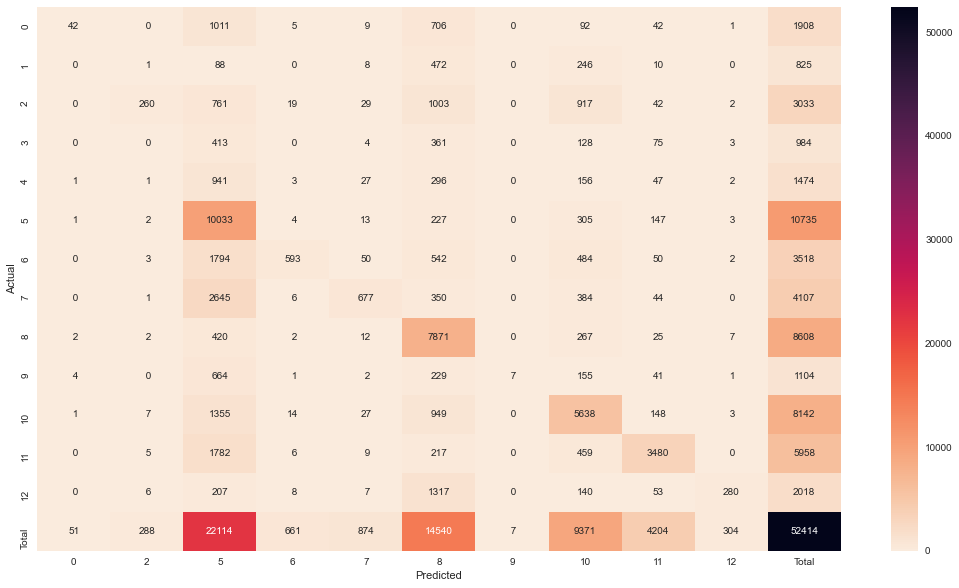

In [123]:
# display confusion matrics result in crosstab

print(class_mapping)
print("-"*70)
cross = pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'],margins=True,margins_name='Total',dropna=False)

plt.figure(figsize=(18,10))
sns.heatmap(cross,cmap='rocket_r',annot=True,fmt='2g');

In [126]:
cross

Predicted,0,2,5,6,7,8,9,10,11,12,Total
Actual,,,,,,,,,,,
0,42,0,1011,5,9,706,0,92,42,1,1908
1,0,1,88,0,8,472,0,246,10,0,825
2,0,260,761,19,29,1003,0,917,42,2,3033
3,0,0,413,0,4,361,0,128,75,3,984
4,1,1,941,3,27,296,0,156,47,2,1474
5,1,2,10033,4,13,227,0,305,147,3,10735
6,0,3,1794,593,50,542,0,484,50,2,3518
7,0,1,2645,6,677,350,0,384,44,0,4107
8,2,2,420,2,12,7871,0,267,25,7,8608


In [124]:
# display the classififcation report

print(classification_report(y_test, y_pred, target_names=class_mapping.keys()));

                              precision    recall  f1-score   support

              BUSINESS-MONEY       0.82      0.02      0.04      1908
                       CRIME       0.00      0.00      0.00       825
            EMPOWERED VOICES       0.90      0.09      0.16      3033
                 ENVIRONMENT       0.00      0.00      0.00       984
                     GENERAL       0.00      0.00      0.00      1474
                   LIFESTYLE       0.45      0.93      0.61     10735
               MISCELLANEOUS       0.90      0.17      0.28      3518
     PARENTING AND EDUCATION       0.77      0.16      0.27      4107
                    POLITICS       0.54      0.91      0.68      8608
            SCIENCE AND TECH       1.00      0.01      0.01      1104
    SPORTS AND ENTERTAINMENT       0.60      0.69      0.64      8142
TRAVEL-TOURISM & ART-CULTURE       0.83      0.58      0.68      5958
                   WORLDNEWS       0.92      0.14      0.24      2018

                  

/Users/ganeshkale/work/dsc550datamining/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ganeshkale/work/dsc550datamining/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ganeshkale/work/dsc550datamining/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Train data on different classification Models and evaluate the models accuracy

The news classification data is trained on different machine learning algorithms and each model will be evaluated for accuracy, confusion matrix and classification reports.
The model which will produce higher accuracy will be used as final model for news categorization.

### Linear Support Vector Machine

**Support vector machines (SVMs)** are a set of supervised learning methods used for classification, regression and outliers detection.
Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier. For multiclass classification, the same principle is utilized after breaking down the multiclassification problem into multiple binary classification problems. 

The advantages of support vector machines are:

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.


In [127]:
# import required packages for model building

from sklearn.linear_model import SGDClassifier

In [128]:
# create insatnce of Support vector Machine model

sgd = SGDClassifier()

In [129]:
# train the model

sgd.fit(X_train,y_train)

SGDClassifier()

### _Model Evaluation_

To evaluate the Linear SVM model we are going to calculate accuracy, confusion matrix and classification report

In [130]:
# import required packages to evaluate model building

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [131]:
# predict the classes uisng trained model

y_pred_sgd = sgd.predict(X_test)

In [132]:
# calculate the accuracy of model

f"Accuracy of Model: {round(accuracy_score(y_test,y_pred_sgd),4)}"

'Accuracy of Model: 0.6791'

In [133]:
# display confusion matrix

confusion_matrix(y_test, y_pred_sgd)

array([[ 718,    5,   12,   17,   10,  461,   31,   84,  295,   21,  115,
         111,   28],
       [  10,  263,   32,    6,    5,   59,   18,   66,  174,    0,  119,
          32,   41],
       [  11,   32, 1385,    4,    8,  273,   76,  167,  398,    2,  572,
          87,   18],
       [  11,    6,    4,  219,   15,  199,    3,   48,  200,   10,  101,
         123,   45],
       [  62,    9,   34,   35,  110,  463,   52,  239,  118,    6,  144,
         139,   63],
       [  49,    5,   45,   11,   15, 9300,   85,  297,  168,   18,  332,
         383,   27],
       [  21,    6,   74,    1,   20,  608, 1828,  201,  287,   15,  311,
         105,   41],
       [  29,    7,   28,    2,   17,  651,   42, 2849,  148,    9,  204,
         111,   10],
       [  56,   21,  117,   23,   20,  249,   47,  119, 7395,   20,  240,
         109,  192],
       [  50,    4,   12,   29,    4,  307,    9,   41,  100,  304,  146,
          74,   24],
       [  29,   31,  115,    8,   15,  708,  107, 

{'BUSINESS-MONEY': 0, 'CRIME': 1, 'EMPOWERED VOICES': 2, 'ENVIRONMENT': 3, 'GENERAL': 4, 'LIFESTYLE': 5, 'MISCELLANEOUS': 6, 'PARENTING AND EDUCATION': 7, 'POLITICS': 8, 'SCIENCE AND TECH': 9, 'SPORTS AND ENTERTAINMENT': 10, 'TRAVEL-TOURISM & ART-CULTURE': 11, 'WORLDNEWS': 12}
------------------------------------------------------------------------------------------------------------------------------------------------------


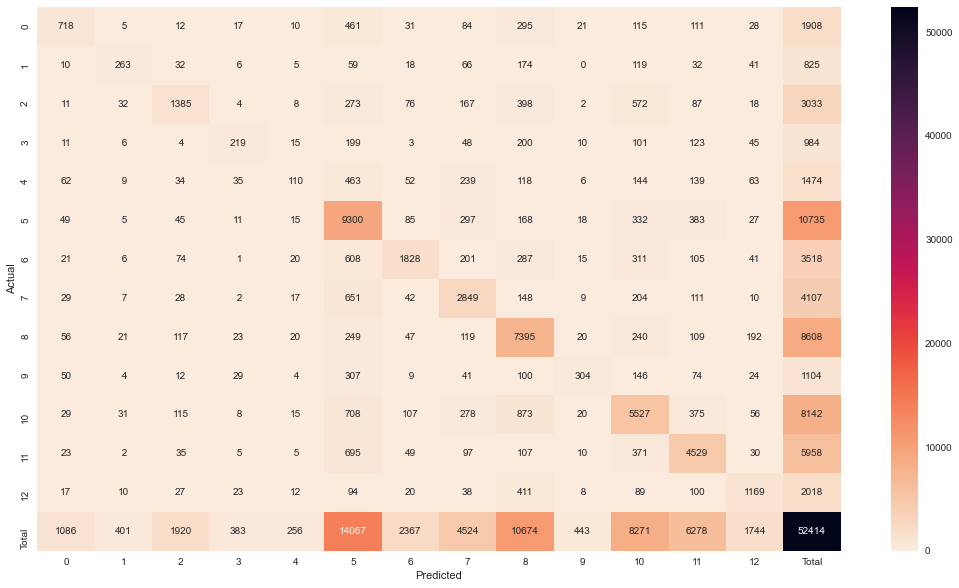

In [134]:
# display confusion matrics result in crosstab

print(class_mapping)
print("-"*150)
cross = pd.crosstab(y_test,y_pred_sgd,rownames=['Actual'], colnames=['Predicted'],margins=True,margins_name='Total',dropna=False)

plt.figure(figsize=(18,10))
sns.heatmap(cross,cmap='rocket_r',annot=True,fmt='2g');

In [135]:
# display the classififcation report

y_pred_sgd = sgd.predict(X_test)

print(classification_report(y_test, y_pred_sgd, target_names=class_mapping.keys()));

                              precision    recall  f1-score   support

              BUSINESS-MONEY       0.66      0.38      0.48      1908
                       CRIME       0.66      0.32      0.43       825
            EMPOWERED VOICES       0.72      0.46      0.56      3033
                 ENVIRONMENT       0.57      0.22      0.32       984
                     GENERAL       0.43      0.07      0.13      1474
                   LIFESTYLE       0.66      0.87      0.75     10735
               MISCELLANEOUS       0.77      0.52      0.62      3518
     PARENTING AND EDUCATION       0.63      0.69      0.66      4107
                    POLITICS       0.69      0.86      0.77      8608
            SCIENCE AND TECH       0.69      0.28      0.39      1104
    SPORTS AND ENTERTAINMENT       0.67      0.68      0.67      8142
TRAVEL-TOURISM & ART-CULTURE       0.72      0.76      0.74      5958
                   WORLDNEWS       0.67      0.58      0.62      2018

                  

The Lineaer SVM Classifier model accuracy is: 0.68

### Logistic Regression - As Classification

Logistic Regression  - 

Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1. This algorithm can be used for multiclass classification because multiclass classification is built on the binary classification. The appraoch used for multi-class classification is one vs all method.


In [136]:
# import required package for model building

from sklearn.linear_model import LogisticRegression

In [137]:
# create insatnce of model

logit = LogisticRegression()

In [138]:
# train the model

logit.fit(X_train,y_train)

/Users/ganeshkale/work/dsc550datamining/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### _Evaluate Model_

In [139]:
# predict the classes uisng trained model

y_pred_lg = logit.predict(X_test)

In [140]:
# calculate the accuracy of model

f"Accuracy of Model: {round(accuracy_score(y_test,y_pred_lg),4)}"

'Accuracy of Model: 0.6996'

In [141]:
# display confusion matrix

confusion_matrix(y_test, y_pred_lg)

array([[ 908,    3,   11,   20,   20,  364,   39,   68,  204,   29,  126,
          82,   34],
       [   7,  361,   38,    6,    5,   41,   18,   32,  142,    3,  128,
          18,   26],
       [  13,   53, 1540,    3,   26,  208,   77,  134,  324,    5,  552,
          75,   23],
       [  24,    6,    1,  359,   35,  125,    3,   30,  134,   14,  124,
          94,   35],
       [  63,   10,   33,   30,  282,  360,   75,  191,  104,    9,  166,
         106,   45],
       [  96,    2,   43,   20,   46, 9114,  130,  264,  160,   32,  422,
         383,   23],
       [  30,    9,   71,    2,   18,  487, 2020,  163,  216,   10,  363,
          93,   36],
       [  44,    8,   35,    4,   21,  620,   67, 2768,  121,   15,  287,
         108,    9],
       [ 107,   42,  142,   64,   38,  229,  102,  106, 7045,   27,  407,
          85,  214],
       [  56,    1,   13,   36,    1,  225,   14,   32,   62,  408,  178,
          59,   19],
       [  40,   54,  166,   24,   26,  525,  123, 

{'BUSINESS-MONEY': 0, 'CRIME': 1, 'EMPOWERED VOICES': 2, 'ENVIRONMENT': 3, 'GENERAL': 4, 'LIFESTYLE': 5, 'MISCELLANEOUS': 6, 'PARENTING AND EDUCATION': 7, 'POLITICS': 8, 'SCIENCE AND TECH': 9, 'SPORTS AND ENTERTAINMENT': 10, 'TRAVEL-TOURISM & ART-CULTURE': 11, 'WORLDNEWS': 12}
----------------------------------------------------------------------


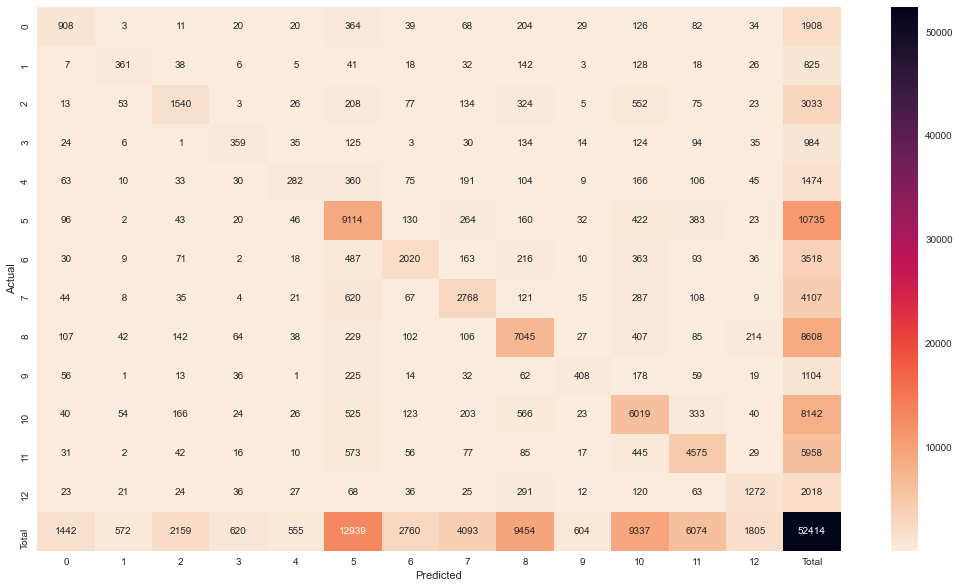

In [142]:
# display confusion matrics result in crosstab

print(class_mapping)
print("-"*70)
cross = pd.crosstab(y_test,y_pred_lg,rownames=['Actual'], colnames=['Predicted'],margins=True,margins_name='Total',dropna=False)

plt.figure(figsize=(18,10))
sns.heatmap(cross,cmap='rocket_r',annot=True,fmt='2g');

In [143]:
# display the classififcation report


print(classification_report(y_test, y_pred_lg, target_names=class_mapping.keys()));

                              precision    recall  f1-score   support

              BUSINESS-MONEY       0.63      0.48      0.54      1908
                       CRIME       0.63      0.44      0.52       825
            EMPOWERED VOICES       0.71      0.51      0.59      3033
                 ENVIRONMENT       0.58      0.36      0.45       984
                     GENERAL       0.51      0.19      0.28      1474
                   LIFESTYLE       0.70      0.85      0.77     10735
               MISCELLANEOUS       0.73      0.57      0.64      3518
     PARENTING AND EDUCATION       0.68      0.67      0.68      4107
                    POLITICS       0.75      0.82      0.78      8608
            SCIENCE AND TECH       0.68      0.37      0.48      1104
    SPORTS AND ENTERTAINMENT       0.64      0.74      0.69      8142
TRAVEL-TOURISM & ART-CULTURE       0.75      0.77      0.76      5958
                   WORLDNEWS       0.70      0.63      0.67      2018

                  

The Logistic Regression Classification model accuracy is: 0.70

## XGBOOST Classifier

What is XGBoost Algorithm - 

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.


It is more apt for multi-class classification task. By default,XGBClassifier or many Classifier uses objective as binary but what it does internally is classifying (one vs rest).

In [144]:
#  import required packages

from xgboost import XGBClassifier

In [152]:
# create instance of xgboostclassifier

xgb = XGBClassifier(max_depth = 7, learning_rate=0.001, objective = 'multi:softmax',num_classes = 13,use_label_encoder=False)

In [153]:
# train the model

xgb.fit(X_train,y_train)

/Users/ganeshkale/work/dsc550datamining/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:52:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "num_classes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_classes=13, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### _Evaluate the Model_

In [154]:
# predict the classes uisng trained model

y_pred_lg = logit.predict(X_test)

In [155]:
# calculate the accuracy of model

f"Accuracy of Model: {round(accuracy_score(y_test,y_pred_lg),4)}"

'Accuracy of Model: 0.6996'

In [149]:
# display confusion matrix

confusion_matrix(y_test, y_pred_lg)

array([[ 908,    3,   11,   20,   20,  364,   39,   68,  204,   29,  126,
          82,   34],
       [   7,  361,   38,    6,    5,   41,   18,   32,  142,    3,  128,
          18,   26],
       [  13,   53, 1540,    3,   26,  208,   77,  134,  324,    5,  552,
          75,   23],
       [  24,    6,    1,  359,   35,  125,    3,   30,  134,   14,  124,
          94,   35],
       [  63,   10,   33,   30,  282,  360,   75,  191,  104,    9,  166,
         106,   45],
       [  96,    2,   43,   20,   46, 9114,  130,  264,  160,   32,  422,
         383,   23],
       [  30,    9,   71,    2,   18,  487, 2020,  163,  216,   10,  363,
          93,   36],
       [  44,    8,   35,    4,   21,  620,   67, 2768,  121,   15,  287,
         108,    9],
       [ 107,   42,  142,   64,   38,  229,  102,  106, 7045,   27,  407,
          85,  214],
       [  56,    1,   13,   36,    1,  225,   14,   32,   62,  408,  178,
          59,   19],
       [  40,   54,  166,   24,   26,  525,  123, 

{'BUSINESS-MONEY': 0, 'CRIME': 1, 'EMPOWERED VOICES': 2, 'ENVIRONMENT': 3, 'GENERAL': 4, 'LIFESTYLE': 5, 'MISCELLANEOUS': 6, 'PARENTING AND EDUCATION': 7, 'POLITICS': 8, 'SCIENCE AND TECH': 9, 'SPORTS AND ENTERTAINMENT': 10, 'TRAVEL-TOURISM & ART-CULTURE': 11, 'WORLDNEWS': 12}
----------------------------------------------------------------------


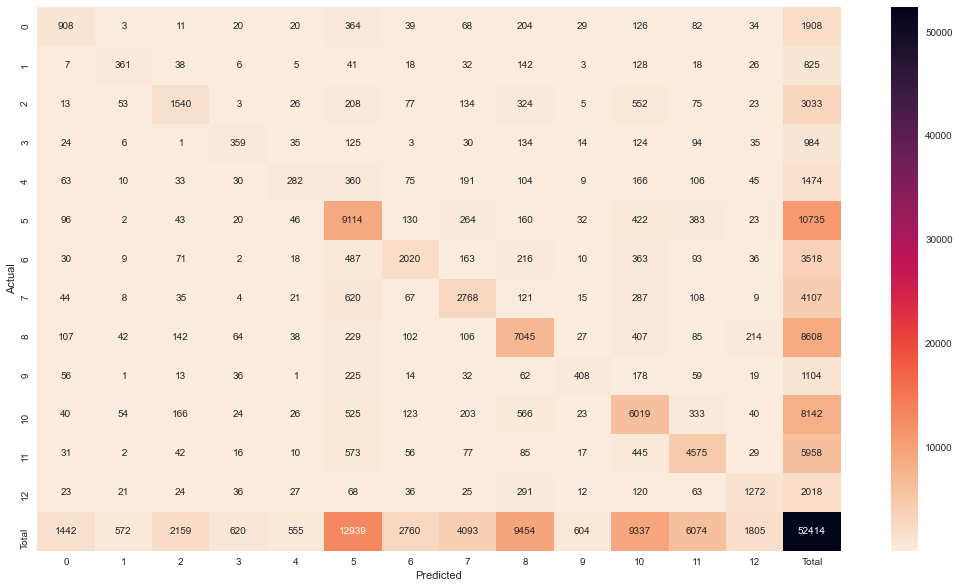

In [150]:
# display confusion matrics result in crosstab

print(class_mapping)
print("-"*70)
cross = pd.crosstab(y_test,y_pred_lg,rownames=['Actual'], colnames=['Predicted'],margins=True,margins_name='Total',dropna=False)

plt.figure(figsize=(18,10))
sns.heatmap(cross,cmap='rocket_r',annot=True,fmt='2g');

In [156]:
# display the classififcation report


print(classification_report(y_test, y_pred_lg, target_names=class_mapping.keys()));

                              precision    recall  f1-score   support

              BUSINESS-MONEY       0.63      0.48      0.54      1908
                       CRIME       0.63      0.44      0.52       825
            EMPOWERED VOICES       0.71      0.51      0.59      3033
                 ENVIRONMENT       0.58      0.36      0.45       984
                     GENERAL       0.51      0.19      0.28      1474
                   LIFESTYLE       0.70      0.85      0.77     10735
               MISCELLANEOUS       0.73      0.57      0.64      3518
     PARENTING AND EDUCATION       0.68      0.67      0.68      4107
                    POLITICS       0.75      0.82      0.78      8608
            SCIENCE AND TECH       0.68      0.37      0.48      1104
    SPORTS AND ENTERTAINMENT       0.64      0.74      0.69      8142
TRAVEL-TOURISM & ART-CULTURE       0.75      0.77      0.76      5958
                   WORLDNEWS       0.70      0.63      0.67      2018

                  

The XGBoost Classifier model accuracy is: 0.82

Based on all above model trained on the news data set to classifty the news categories based on the news headlines and short description, the XGBoost model has better accuracy, which is 0.82.
Below is summary of model and their accuracy - 

- Naive Bayes Classifier (Multinominal Naive Bayes): Accuracy: 0.55

- Linear SVM: Accuracy: 0.68

- Logistic Regression: Accuracy: 0.70

- XGBoost: Accuracy: 0.70


### Conclusion Summary - 

This is high level summary provided here, the final in detail conclusion summary is provided in Case Study Report with FInal Project.

After building and evaluating multiple classification models, we can see that the XGBoost has better accuracy and since it uses gradient boosting it provides better result than other classifier models.

Based on this we can recommend XGBoost Classifier model as final model for our project to predict the news categories.

Since our problem statement of this project was to use machine learning techniques to help predict the right news category based on news head lines and short description. This process was done manually by reading headlines and summary of news. With this model this process can be automated and model will categories the news appropriatley.


Also, model accuracy will be improved over the time by tunning the model with newly categorized news data and fed that to model to learn different categories and different data with news headlines and short summaries.

Also, same model cane be used for news recommendation based on past reading history os users and new news feed will be appropriately fed into accurate category, this way user can find their favorite news on their finger tips and they do not need to search for them.

Our Project, News Categorization, is model to classify news based on news headlines and short summary that would help news editors, owners, and end users. 

## END